In [1]:
from astropy.table import Table, column
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

import sys
sys.path.append('../astro_codes/')
from luminosities_magnitudes_and_distances import mag_to_Mag

In [2]:
data = Table.read('GAMA_fits/gama09.fits')
gama_ok = np.all([data['absmag_r'] > -99,data['GALRE_r_kpc'] > -99,data['GALRE_r_kpc'] < 20],axis=0)
data_ = data[gama_ok]
print('{}/{} GAMA galaxies have sizes and magnitudes'.format(gama_ok.sum(),len(gama_ok)))

11330/11507 GAMA galaxies have sizes and magnitudes


M_r (limit) = -18.915185519784764


/Users/rosshart/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


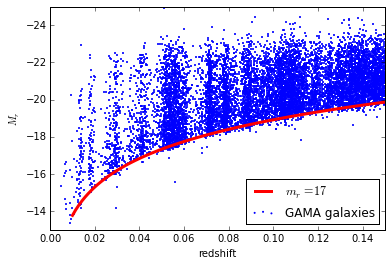

In [3]:
zs = np.linspace(0.01,0.15,100)
Mags = mag_to_Mag(19.4,zs)

_ = plt.scatter(data_['Z_TONRY'],data_['absmag_r_stars'],color='b',s=1,
                label='GAMA galaxies')
_ = plt.plot(zs,Mags,color='r',label='$m_r=17$',lw=3)
_ = plt.xlabel('redshift')
_ = plt.ylabel('$M_r$')
_ = plt.legend(loc='lower right')

Mag_limit = mag_to_Mag(19.4,0.1)
print('M_r (limit) = {}'.format(Mag_limit))

_ = plt.axis((0,0.15,-13,-25))

In [5]:
import make_dictionaries

In [19]:
question_dictionary = make_dictionaries.questions

for question in question_dictionary.keys():
    answers = question_dictionary[question]['answers']
    for answer in answers:
        frac_column = data_[question+'_'+answer]/data_[question+'_total']
        data_[question+'_'+answer+'_fraction'] = frac_column

In [26]:
in_volume_limit = np.all([data_['Z_TONRY'] <= 0.1, data_['Z_TONRY'] >= 0.02, 
                          data_['absmag_r_stars'] <= Mag_limit],axis=0)

data_['in_volume_limit'] = in_volume_limit

data_.write('GAMA_fits/gama09_less.fits',overwrite=True)